Лабораторна робота №2

1. Регресія на згенерованому наборі даних

In [37]:
# * Генерація набору даних
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, n_informative=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

df.to_csv('data1.csv', index=False)
df


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-0.735201,1.798725,-1.095519,1.656208,-0.880754,47.887298
1,-1.613561,-1.371901,-0.172946,1.471170,1.711708,-33.542467
2,0.651391,0.954002,0.570891,-0.315269,1.135566,75.040627
3,-1.350556,-0.687014,-0.475795,-0.075871,-0.826112,-55.337505
4,1.554160,0.342338,-0.530971,0.853976,-0.335138,0.470015
...,...,...,...,...,...,...
995,0.915390,-0.833056,-1.776246,-0.549540,-0.080600,-69.784443
996,-0.467701,1.160827,-1.119670,0.346504,-1.294681,10.086744
997,-0.592464,-1.234349,0.964852,-0.026406,1.615583,-10.002526
998,-0.820682,1.158596,-0.974682,0.963376,0.787085,51.952917


In [38]:
# * Розподіл даних
data = pd.read_csv('data1.csv')

print(data.head(), "\n")
print(data.info(), "\n")
print(data.describe(), "\n")

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  47.887298
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -33.542467
2   0.651391   0.954002   0.570891  -0.315269   1.135566  75.040627
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -55.337505
4   1.554160   0.342338  -0.530971   0.853976  -0.335138   0.470015 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None 

         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.00000

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

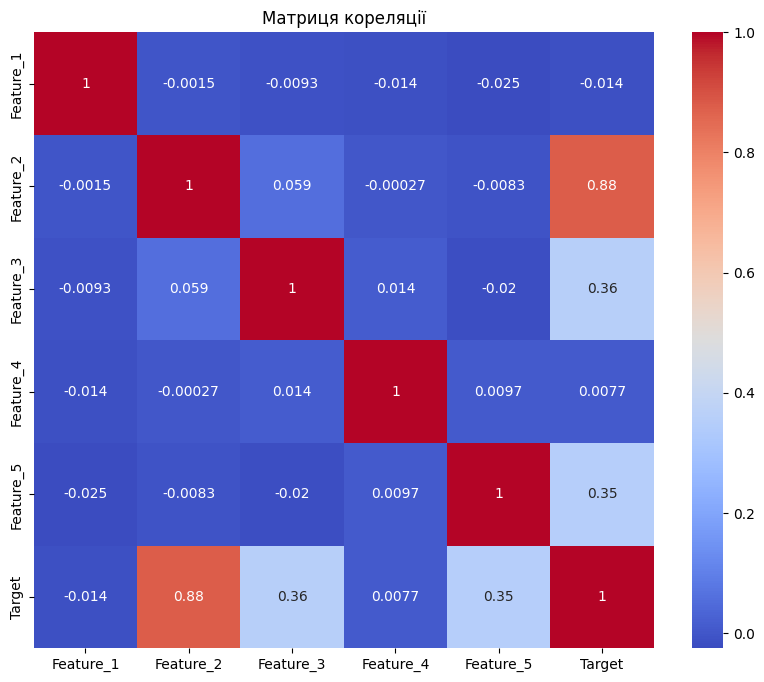

In [41]:
# * Побудова моделі регресії 
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

2. Аналіз часових даних

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temp_df = pd.read_csv('data2.csv', parse_dates=['Date'], index_col='Date')
temp_df.head()

,TemperatureData
Date,
2022-01-01,-25
2022-01-02,-24
2022-01-03,-26
2022-01-04,-27
2022-01-05,-29


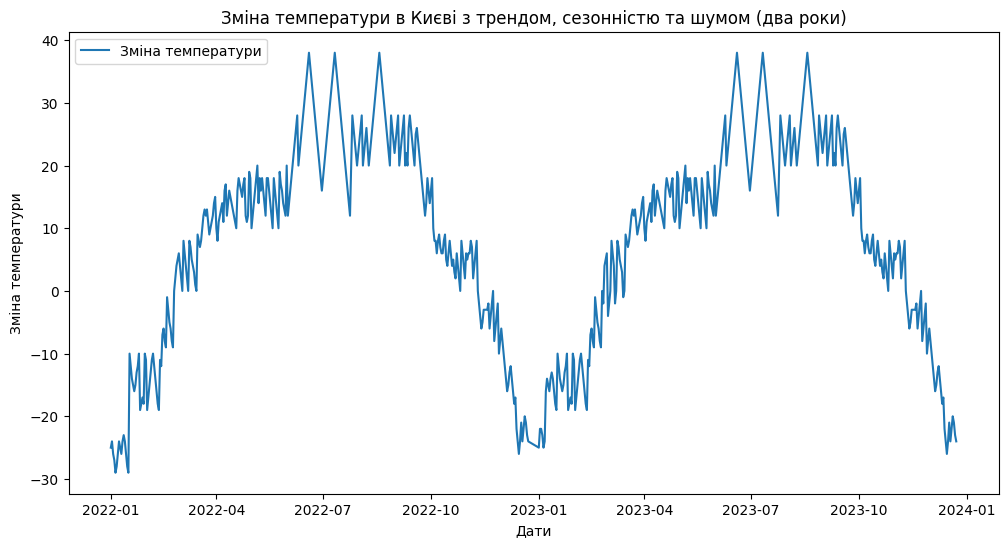

Augmented Dickey-Fuller
ADF Statistic: -1.28
p-value: 0.64
Критичні значення:
1%: -3.44
5%: -2.87
10%: -2.57


In [96]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(12, 6))
plt.plot(temp_df.index, temp_df['TemperatureData'], label='Зміна температури')
plt.title('Зміна температури в Києві з трендом, сезонністю та шумом (два роки)')
plt.xlabel('Дати')
plt.ylabel('Зміна температури')
plt.legend()
plt.show()

result = adfuller(temp_df)
print("Augmented Dickey-Fuller")
print(f'ADF Statistic: {result[0]:.2f}') 
print(f'p-value: {result[1]:.2f}')
print('Критичні значення:')
for key, value in result[4].items():
    print(f'{key}: {value:.2f}')

In [132]:
decomposition = seasonal_decompose(temp_df, model='additive', period=12)
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residuals = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(temp_df, label='Часовий ряд')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_component, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality_component, label='Сезонність')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Залишкові')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1200x800 with 0 Axes>

3. Підготовка та аналіз даних на основі файлу AmesHousing.csv

In [107]:
# * Завантаження даних
data = pd.read_csv('AmesHousing.csv')

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1896,1897,534425080,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
12,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
249,250,906378100,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
2420,2421,528228325,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
484,485,528275160,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2551,534429130,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal
1382,1383,905107280,85,RL,NaN,7703,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
356,357,527163040,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
812,813,906226120,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca


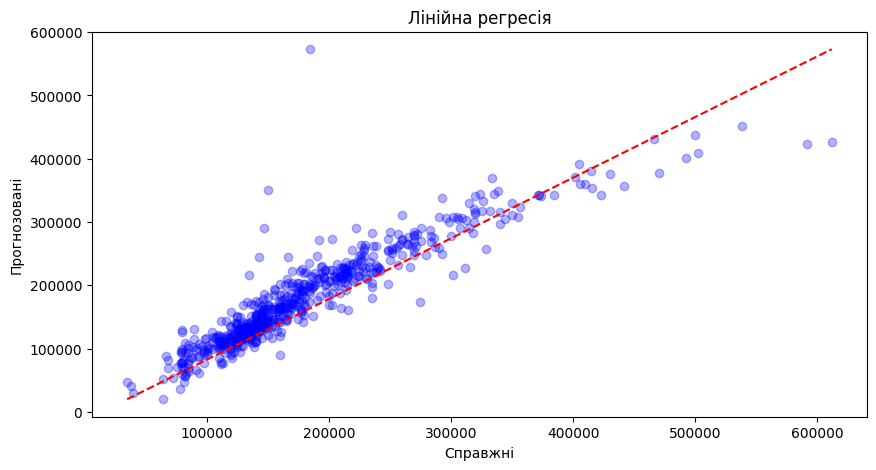

In [123]:
from sklearn.preprocessing import LabelEncoder

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

X.fillna(X.mean(), inplace=True)   

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
plt.xlabel("Справжні")
plt.ylabel("Прогнозовані")
plt.title("Лінійна регресія")
plt.scatter(y_test, y_pred, c='blue', alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ='red')

plt.show()